# Venture Funding with Deep Learning

You work as a risk management associate at Alphabet Soup, a venture capital firm. Alphabet Soup’s business team receives many funding applications from startups every day. This team has asked you to help them create a model that predicts whether applicants will be successful if funded by Alphabet Soup.

The business team has given you a CSV containing more than 34,000 organizations that have received funding from Alphabet Soup over the years. With your knowledge of machine learning and neural networks, you decide to use the features in the provided dataset to create a binary classifier model that will predict whether an applicant will become a successful business. The CSV file contains a variety of information about these businesses, including whether or not they ultimately became successful.

## Instructions:

The steps for this challenge are broken out into the following sections:

* Prepare the data for use on a neural network model.

* Compile and evaluate a binary classification model using a neural network.

* Optimize the neural network model.

### Prepare the Data for Use on a Neural Network Model 

Using your knowledge of Pandas and scikit-learn’s `StandardScaler()`, preprocess the dataset so that you can use it to compile and evaluate the neural network model later.

Open the starter code file, and complete the following data preparation steps:

1. Read the `applicants_data.csv` file into a Pandas DataFrame. Review the DataFrame, looking for categorical variables that will need to be encoded, as well as columns that could eventually define your features and target variables.   

2. Drop the “EIN” (Employer Identification Number) and “NAME” columns from the DataFrame, because they are not relevant to the binary classification model.
 
3. Encode the dataset’s categorical variables using `OneHotEncoder`, and then place the encoded variables into a new DataFrame.

4. Add the original DataFrame’s numerical variables to the DataFrame containing the encoded variables.

> **Note** To complete this step, you will employ the Pandas `concat()` function that was introduced earlier in this course. 

5. Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “IS_SUCCESSFUL”. The remaining columns should define the features dataset. 

6. Split the features and target sets into training and testing datasets.

7. Use scikit-learn's `StandardScaler` to scale the features data.

### Compile and Evaluate a Binary Classification Model Using a Neural Network

Use your knowledge of TensorFlow to design a binary classification deep neural network model. This model should use the dataset’s features to predict whether an Alphabet Soup&ndash;funded startup will be successful based on the features in the dataset. Consider the number of inputs before determining the number of layers that your model will contain or the number of neurons on each layer. Then, compile and fit your model. Finally, evaluate your binary classification model to calculate the model’s loss and accuracy. 
 
To do so, complete the following steps:

1. Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.

2. Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.

> **Hint** When fitting the model, start with a small number of epochs, such as 20, 50, or 100.

3. Evaluate the model using the test data to determine the model’s loss and accuracy.

4. Save and export your model to an HDF5 file, and name the file `AlphabetSoup.h5`. 

### Optimize the Neural Network Model

Using your knowledge of TensorFlow and Keras, optimize your model to improve the model's accuracy. Even if you do not successfully achieve a better accuracy, you'll need to demonstrate at least two attempts to optimize the model. You can include these attempts in your existing notebook. Or, you can make copies of the starter notebook in the same folder, rename them, and code each model optimization in a new notebook. 

> **Note** You will not lose points if your model does not achieve a high accuracy, as long as you make at least two attempts to optimize the model.

To do so, complete the following steps:

1. Define at least three new deep neural network models (the original plus 2 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.

2. After finishing your models, display the accuracy scores achieved by each model, and compare the results.

3. Save each of your models as an HDF5 file.


In [ ]:
# Imports
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
%matplotlib inline
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest

---

## Prepare the data to be used on a neural network model

### Step 1: Read the `applicants_data.csv` file into a Pandas DataFrame. Review the DataFrame, looking for categorical variables that will need to be encoded, as well as columns that could eventually define your features and target variables.  


In [ ]:
# Upload credit_card_transactions.csv to Colab
from google.colab import files

csv_file = files.upload()

Saving applicants_data.csv to applicants_data.csv


In [ ]:
# Read the applicants_data.csv file from the Resources folder into a Pandas DataFrame

#Reads our csv file and transforms it into a Pandas DataFrame
applicant_data_df = pd.read_csv("applicants_data.csv")

# Review the DataFrame

#Reviews the first five rows of our DataFrame using the head function
applicant_data_df.head()


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [ ]:
# Review the data types associated with the columns

#Shows the data type of each column
applicant_data_df.dtypes


EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

### Step 2: Drop the “EIN” (Employer Identification Number) and “NAME” columns from the DataFrame, because they are not relevant to the binary classification model.

In [ ]:
# Drop the 'EIN' and 'NAME' columns from the DataFrame

#Drops the EIN and NAME from the DataFrame using the drop function
applicant_data_df = applicant_data_df.drop(columns=["EIN","NAME"])

# Review the DataFrame

#Reviews the first five rows of our DataFrame to verify if the columns were dropped
applicant_data_df.head()


,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


### Step 3: Encode the dataset’s categorical variables using `OneHotEncoder`, and then place the encoded variables into a new DataFrame.

In [ ]:
# Create a list of categorical variables 

#Creates a list including the categorical variables from our original DataFrame
categorical_variables = list(applicant_data_df.dtypes.index[applicant_data_df.dtypes == "object"])

# Display the categorical variables list

#Displays the categorical values obtained in the previous step
categorical_variables


['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [ ]:
# Create a OneHotEncoder instance

#Creates an encoder instance using OneHotEncoder
enc = OneHotEncoder(sparse=False)


In [ ]:
# Encode the categorcal variables using OneHotEncoder

#Encodes the categorical variables in our DataFrame using our encoder distance, it selects only the varibles within the categorical_variables list
encoded_data = enc.fit_transform(applicant_data_df[categorical_variables])


In [ ]:
# Create a DataFrame with the encoded variables

#Creates a DataFrame with our encoded variables
encoded_df = encoded_df = pd.DataFrame(encoded_data, columns = enc.get_feature_names_out(categorical_variables))

# Review the DataFrame

#Displays the first five rows of our DataFrame, as you can see now the categorical data is represented as 0s or 1s
encoded_df.head()

,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Step 4: Add the original DataFrame’s numerical variables to the DataFrame containing the encoded variables.

> **Note** To complete this step, you will employ the Pandas `concat()` function that was introduced earlier in this course. 

In [ ]:
# Add the numerical variables from the original DataFrame to the one-hot encoding DataFrame

#Concatenates our encoded_df with the desired columns from our applicant_data_df
encoded_df = pd.concat([encoded_df, applicant_data_df[["STATUS","ASK_AMT","IS_SUCCESSFUL"]]], axis="columns", join="inner")
# Review the Dataframe

#Displays the first five rows of our concatenated DataFrame to ensure all required columns are present
encoded_df.head()


,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,STATUS,ASK_AMT,IS_SUCCESSFUL
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5000,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,108590,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5000,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,6692,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,142590,1


### Step 5: Using the preprocessed data, create the features (`X`) and target (`y`) datasets. The target dataset should be defined by the preprocessed DataFrame column “IS_SUCCESSFUL”. The remaining columns should define the features dataset. 



In [ ]:
# Define the target set y using the IS_SUCCESSFUL column

#Defines y which is only the values from the "IS_SUCCESSFUL" column
y = encoded_df["IS_SUCCESSFUL"].values

# Display a sample of y

#Displays a sample of y
y[:5]

array([1, 1, 0, 1, 1])

In [ ]:
# Define features set X by selecting all columns but IS_SUCCESSFUL

#Defines X which is all the columns but the "IS_SUCCESSFUL" column
X = encoded_df.drop(columns='IS_SUCCESSFUL').copy()

# Review the features DataFrame

#Displays a sample of X using the head function
X.head()


,APPLICATION_TYPE_T10,APPLICATION_TYPE_T12,APPLICATION_TYPE_T13,APPLICATION_TYPE_T14,APPLICATION_TYPE_T15,APPLICATION_TYPE_T17,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T29,...,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y,STATUS,ASK_AMT
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,108590
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,5000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,6692
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,142590


### Step 6: Split the features and target sets into training and testing datasets.


In [ ]:
# Split the preprocessed data into a training and testing dataset
# Assign the function a random_state equal to 1

#Splits the data between testing and training data
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)


### Step 7: Use scikit-learn's `StandardScaler` to scale the features data.

In [ ]:
# Create a StandardScaler instance

#Creates a Standard Scaler Instance
scaler = StandardScaler()

# Fit the scaler to the features training dataset

#Fits our X training data to the scaler
X_scaler = scaler.fit(X_train)

# Fit the scaler to the features training dataset

#Transforms our X training and test data using the previously created and trained scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


---

## Compile and Evaluate a Binary Classification Model Using a Neural Network

### Step 1: Create a deep neural network by assigning the number of input features, the number of layers, and the number of neurons on each layer using Tensorflow’s Keras.

> **Hint** You can start with a two-layer deep neural network model that uses the `relu` activation function for both layers.


In [ ]:
# Define the the number of inputs (features) to the model

#Defines our number of features
number_input_features =  X.shape[1]

# Review the number of features

#Displays the number of features
number_input_features


116

In [ ]:
# Define the number of neurons in the output layer

#Defines the number of output neurons
number_output_neurons = 1

In [ ]:
# Define the number of hidden nodes for the first hidden layer

#Defines the number of hidden nodes for the first layer
hidden_nodes_layer1 =  9

# Review the number hidden nodes in the first layer

#Dipslays the the number of hidden nodes for the first layer
hidden_nodes_layer1


9

In [ ]:
# Define the number of hidden nodes for the second hidden layer

#Defines the number of hidden nodes for the second layer
hidden_nodes_layer2 =  6

# Review the number hidden nodes in the second layer

#Dipslays the the number of hidden nodes for the second layer
hidden_nodes_layer2


6

In [ ]:
# Create the Sequential model instance

#Creates a Sequential model instance and assigns it to a variable
nn = Sequential()


In [ ]:
# Add the first hidden layer

#Adds the first hidden layer to our model
nn.add(Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))


In [ ]:
# Add the second hidden layer

#Adds the second hidden layer to our model
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))


In [ ]:
# Add the output layer to the model specifying the number of output neurons and activation function

#Adds the output layer to our model
nn.add(Dense(units=number_output_neurons, activation="linear"))

In [ ]:
# Display the Sequential model summary

#Displays a summary of our model
nn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 9)                 1053      
                                                                 
 dense_1 (Dense)             (None, 6)                 60        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 1,120
Trainable params: 1,120
Non-trainable params: 0
_________________________________________________________________


### Step 2: Compile and fit the model using the `binary_crossentropy` loss function, the `adam` optimizer, and the `accuracy` evaluation metric.


In [ ]:
# Compile the Sequential model

#Compiles our model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
# Fit the model using 50 epochs and the training data

#Fits our model
neural_model = nn.fit(X_train_scaled, y_train, epochs=50)


Epoch 1/50
804/804 [==============================] - 2s 2ms/step - loss: 1.0389 - accuracy: 0.6784
Epoch 2/50
804/804 [==============================] - 1s 2ms/step - loss: 0.7711 - accuracy: 0.7151
Epoch 3/50
804/804 [==============================] - 1s 2ms/step - loss: 0.7198 - accuracy: 0.7113
Epoch 4/50
804/804 [==============================] - 1s 2ms/step - loss: 0.6769 - accuracy: 0.7222
Epoch 5/50
804/804 [==============================] - 1s 2ms/step - loss: 0.6753 - accuracy: 0.7235
Epoch 6/50
804/804 [==============================] - 1s 2ms/step - loss: 0.6609 - accuracy: 0.7251
Epoch 7/50
804/804 [==============================] - 1s 2ms/step - loss: 0.6536 - accuracy: 0.7227
Epoch 8/50
804/804 [==============================] - 1s 2ms/step - loss: 0.6583 - accuracy: 0.7187
Epoch 9/50
804/804 [==============================] - 1s 2ms/step - loss: 0.6481 - accuracy: 0.7241
Epoch 10/50
804/804 [==============================] - 1s 2ms/step - loss: 0.6395 - accuracy: 0.7233

### Step 3: Evaluate the model using the test data to determine the model’s loss and accuracy.


In [ ]:
# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.6262 - accuracy: 0.7320 - 426ms/epoch - 2ms/step
Loss: 0.6261879801750183, Accuracy: 0.7320116758346558


### Step 4: Save and export your model to an HDF5 file, and name the file `AlphabetSoup.h5`. 


In [ ]:
# Set the model's file path
weights_filepath = "AlphabetSoup.h5"

# Export your model to a HDF5 file
nn.save_weights(weights_filepath)


---

## Optimize the neural network model


### Step 1: Define at least three new deep neural network models (resulting in the original plus 3 optimization attempts). With each, try to improve on your first model’s predictive accuracy.

> **Rewind** Recall that perfect accuracy has a value of 1, so accuracy improves as its value moves closer to 1. To optimize your model for a predictive accuracy as close to 1 as possible, you can use any or all of the following techniques:
>
> * Adjust the input data by dropping different features columns to ensure that no variables or outliers confuse the model.
>
> * Add more neurons (nodes) to a hidden layer.
>
> * Add more hidden layers.
>
> * Use different activation functions for the hidden layers.
>
> * Add to or reduce the number of epochs in the training regimen.


### Alternative Model 1

In [ ]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

116

In [ ]:
# Define the number of neurons in the output layer
number_output_neurons_A1 = 1

In [ ]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A1 = 20

# Review the number of hidden nodes in the first layer
hidden_nodes_layer1_A1

20

In [ ]:
# Create the Sequential model instance
nn_A1 = Sequential()

In [ ]:
# First hidden layer
nn_A1.add(Dense(units=hidden_nodes_layer1_A1, input_dim=number_input_features, activation="relu"))


# Output layer
nn_A1.add(Dense(units=1, activation="linear"))


# Check the structure of the model
nn_A1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                2340      
                                                                 
 dense_4 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2,361
Trainable params: 2,361
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the Sequential model
nn_A1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


In [ ]:
# Fit the model using 50 epochs and the training data
fit_model_A1 = nn_A1.fit(X_train_scaled, y_train, epochs=100)


Epoch 1/100
804/804 [==============================] - 2s 2ms/step - loss: 1.8161 - accuracy: 0.6053
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 1.3485 - accuracy: 0.6689
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 1.2911 - accuracy: 0.6838
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 1.2082 - accuracy: 0.6896
Epoch 5/100
804/804 [==============================] - 1s 2ms/step - loss: 1.1435 - accuracy: 0.6861
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 1.0284 - accuracy: 0.7029
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.9930 - accuracy: 0.7080
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.9950 - accuracy: 0.7089
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 1.1408 - accuracy: 0.6974
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 1.0115 - accura

#### Alternative Model 2

In [ ]:
# Define the the number of inputs (features) to the model
number_input_features = len(X_train.iloc[0])

# Review the number of features
number_input_features

In [ ]:
# Define the number of neurons in the output layer
number_output_neurons_A2 = 1

In [ ]:
# Define the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A2 = 15


# Review the number of hidden nodes in the first layer
display(hidden_nodes_layer1_A2)

# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A2 = 10


# Review the number of hidden nodes in the second layer
display(hidden_nodes_layer2_A2)

# Define the number of hidden nodes for the second hidden layer
hidden_nodes_layer3_A2 = 5


# Review the number of hidden nodes in the second layer
display(hidden_nodes_layer3_A2)

15

10

5

In [ ]:
# Create the Sequential model instance
nn_A2 = Sequential()

In [ ]:
# First hidden layer
nn_A2.add(Dense(units=hidden_nodes_layer1_A2, input_dim=number_input_features, activation="relu"))

#Second hidden layer
nn_A2.add(Dense(units=hidden_nodes_layer2_A2, input_dim=number_input_features, activation="relu"))

#Third hidden layer
nn_A2.add(Dense(units=hidden_nodes_layer3_A2, input_dim=number_input_features, activation="relu"))

# Output layer
nn_A2.add(Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_A2.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 15)                1755      
                                                                 
 dense_6 (Dense)             (None, 10)                160       
                                                                 
 dense_7 (Dense)             (None, 5)                 55        
                                                                 
 dense_8 (Dense)             (None, 1)                 6         
                                                                 
Total params: 1,976
Trainable params: 1,976
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model
nn_A2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
# Fit the model
fit_model_A2 = nn_A2.fit(X_train_scaled, y_train, epochs=75)


Epoch 1/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5944 - accuracy: 0.7015
Epoch 2/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5559 - accuracy: 0.7253
Epoch 3/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5509 - accuracy: 0.7287
Epoch 4/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5486 - accuracy: 0.7306
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5469 - accuracy: 0.7326
Epoch 6/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5458 - accuracy: 0.7318
Epoch 7/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5447 - accuracy: 0.7324
Epoch 8/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5444 - accuracy: 0.7326
Epoch 9/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5433 - accuracy: 0.7322
Epoch 10/100
804/804 [==============================] - 1s 2ms/step - loss: 0.5428 - accura

#### Alternative Model 3

In [ ]:
#Checking if we can reuse our original DataFrame with dropped columns
applicant_data_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


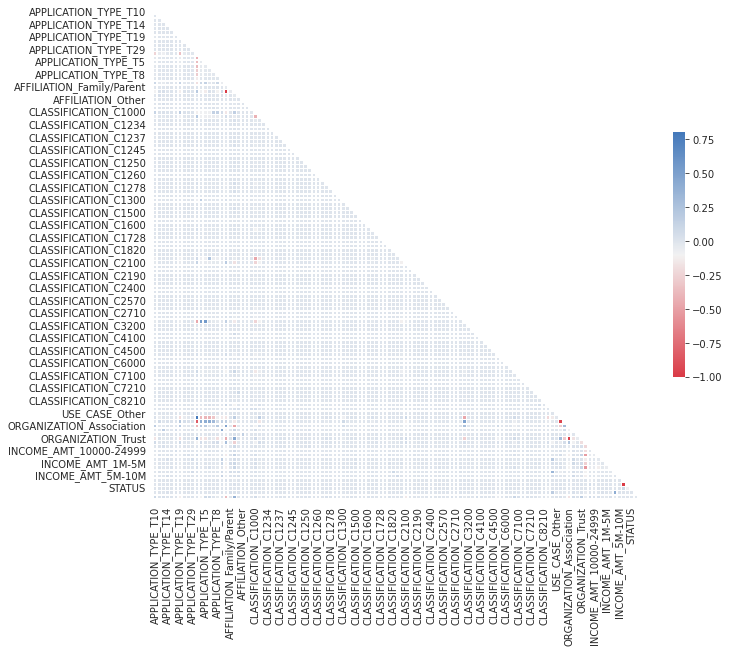

In [ ]:
#Copies the original DataFrame with the dropped EIN and Name Columns
applicant_data_df_A3 = applicant_data_df.copy()


# Drop additionals columns which we don't think have a major impact (For example, Classification and Use Case seem to mean the same information, just different format)
#applicant_data_df_A3 = applicant_data_df_A3.drop(columns=["CLASSIFICATION", "SPECIAL_CONSIDERATIONS"])

# Creates a list of categorical variables 
categorical_variables_A3 = list(applicant_data_df_A3.dtypes[applicant_data_df_A3.dtypes == "object"].index)

# Creates a OneHotEncoder instance
enc_A3 = OneHotEncoder(sparse=False)

# Encodes the categorical data using OneHotEncoder
encoded_data_A3 = enc_A3.fit_transform(applicant_data_df_A3[categorical_variables_A3])

# Creates a DataFrame with the newly econded variables with it's respective columns
encoded_df_A3 = pd.DataFrame(encoded_data_A3,columns = enc_A3.get_feature_names_out(categorical_variables_A3))

# Concatenates the encoded variables (categorical data) with the numerical variables from the original DataFrame
encoded_df_A3 = pd.concat([encoded_df_A3, applicant_data_df_A3['STATUS'],applicant_data_df_A3['ASK_AMT'],applicant_data_df_A3['IS_SUCCESSFUL']], axis="columns", join="inner")

# In this section I was trying to see if I could gain better insight as to which columns or parameters were the least useful to remove them, I calculated the correlation between
# parameters and then proceeded to plot it using seaborn

#Measures the correlation of our variables
corr = encoded_df_A3.corr()

#Plots the correlation between parameters
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.set_style(style = 'white')
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 250, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, 
        square=True,
        linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)


In [ ]:

# Defines the target 
y = encoded_df_A3['IS_SUCCESSFUL'].values

# Define the features by selecting all columns but the target
X = encoded_df_A3.drop(columns='IS_SUCCESSFUL').copy()

# In this section I was trying several selectors to try to automatically filter my parameters to the most useful ones, I decided to not use this method at the end since
# it was giving me worst metrics than the ones I was getting by doing the model without these tools

#selector = VarianceThreshold()
#print("Original feature shape:", X.shape)

#new_X = selector.fit_transform(X)
#print("Transformed feature shape:", new_X.shape)

#selector = SelectKBest()
#print("Original feature shape:", X_A3.shape)

#new_X_A3 = selector.fit_transform(X_A3,y)
#print("Transformed feature shape:", new_X_A3.shape)

#new_X_A3 = pd.DataFrame(new_X_A3)

#If you are interested, you can check some of the resources I was using:
# https://towardsdatascience.com/the-art-of-finding-the-best-features-for-machine-learning-a9074e2ca60d
# https://machinelearningmastery.com/feature-selection-machine-learning-python/


In [ ]:
# Splits our newly created data into training and testing data
X_train_A3, X_test_A3, y_train_A3, y_test_A3 = train_test_split(X,y,random_state=1)

# Creates a StandardScaler instance to adapt all our data to the same scale
scaler_A3 = StandardScaler()

# Fits our scaler instance to the features training dataset
X_scaler_A3 = scaler_A3.fit(X_train_A3)

# Fits our scaler to the features of our training and testing datasets
X_train_scaled_A3 = X_scaler_A3.transform(X_train_A3)
X_test_scaled_A3 = X_scaler_A3.transform(X_test_A3)

# Defines the the number of features to be used the model
number_input_features_A3 = len(X_train_A3.iloc[0])

# Define the number of neurons in the output layer
number_output_neurons_A3 = 6

# Defines the number of hidden nodes for the first hidden layer
hidden_nodes_layer1_A3 = 12

# Defines the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A3 = 9

# Defines the number of hidden nodes for the second hidden layer
hidden_nodes_layer2_A3 = 6

# Creates the Sequential model instance
nn_A3 = Sequential()

# First hidden layer
nn_A3.add(Dense(units=hidden_nodes_layer1_A3, input_dim=number_input_features_A3, activation="relu"))

# Second hidden layer
nn_A3.add(Dense(units=hidden_nodes_layer2_A3, input_dim=number_input_features_A3, activation="relu"))

# Third hidden layer
nn_A3.add(Dense(units=hidden_nodes_layer2_A3, input_dim=number_input_features_A3, activation="relu"))

# Output layer
nn_A3.add(Dense(units=1, activation="sigmoid"))

# Compiles our model
nn_A3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fits our model
fit_model_A3 = nn_A3.fit(X_train_scaled_A3, y_train_A3, epochs= 150)

Epoch 1/150
804/804 [==============================] - 4s 3ms/step - loss: 0.6062 - accuracy: 0.6902
Epoch 2/150
804/804 [==============================] - 2s 3ms/step - loss: 0.5601 - accuracy: 0.7287
Epoch 3/150
804/804 [==============================] - 2s 3ms/step - loss: 0.5522 - accuracy: 0.7296
Epoch 4/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5493 - accuracy: 0.7328
Epoch 5/150
804/804 [==============================] - 1s 2ms/step - loss: 0.5479 - accuracy: 0.7327
Epoch 6/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5467 - accuracy: 0.7332
Epoch 7/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5466 - accuracy: 0.7326
Epoch 8/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5453 - accuracy: 0.7324
Epoch 9/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5451 - accuracy: 0.7342
Epoch 10/150
804/804 [==============================] - 2s 2ms/step - loss: 0.5448 - accura

### Step 2: After finishing your models, display the accuracy scores achieved by each model, and compare the results.

In [ ]:
print("Original Model Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Original Model Results
268/268 - 0s - loss: 0.6262 - accuracy: 0.7320 - 305ms/epoch - 1ms/step
Loss: 0.6261879801750183, Accuracy: 0.7320116758346558


In [ ]:
print("Alternative Model 1 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A1.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 1 Results
268/268 - 0s - loss: 0.6917 - accuracy: 0.7329 - 322ms/epoch - 1ms/step
Loss: 0.6917281746864319, Accuracy: 0.7329446077346802


In [ ]:
print("Alternative Model 2 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A2.evaluate(X_test_scaled, y_test, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 2 Results
268/268 - 0s - loss: 0.5568 - accuracy: 0.7294 - 308ms/epoch - 1ms/step
Loss: 0.556820273399353, Accuracy: 0.7294460535049438


In [ ]:
print("Alternative Model 3 Results")

# Evaluate the model loss and accuracy metrics using the evaluate method and the test data
model_loss, model_accuracy = nn_A3.evaluate(X_test_scaled_A3, y_test_A3, verbose=2)

# Display the model loss and accuracy results
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Alternative Model 3 Results
268/268 - 0s - loss: 0.5537 - accuracy: 0.7306 - 432ms/epoch - 2ms/step
Loss: 0.5537480115890503, Accuracy: 0.7306122183799744


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Step 3: Save each of your alternative models as an HDF5 file.


In [ ]:
#Alternative Model 1

# Set the model's file path
weights_filepath_A1 = "AlphabetSoup_A1.h5"

# Export your model to a HDF5 file
nn_A1.save_weights(weights_filepath_A1)

In [ ]:
#Alternative Model 2

# Set the model's file path
weights_filepath_A2 = "AlphabetSoup_A2.h5"

# Export your model to a HDF5 file
nn_A2.save_weights(weights_filepath_A2)


In [ ]:
#Alternative Model 3

# Set the model's file path
weights_filepath_A3 = "AlphabetSoup_A3.h5"

# Export your model to a HDF5 file
nn_A3.save_weights(weights_filepath_A3)